In [ ]:
# loading libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
penguin_data = pd.read_csv('https://raw.githubusercontent.com/RidwendDev/Magang-AI-Komatik-2023/main/penguins.csv', sep=",")

In [ ]:
penguin_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
penguin_data.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [ ]:
penguin_data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000




1. count: total count of non-null values in the column
2. mean: the average of all the values in that column
3. min: the minimum value in the column
4. max: the maximum value in the column
5. 25%: first quartile in the column after we arrange those values in ascending order
6. 50%: this is the median or the second quartile
7. 75%: the third quartile
8. std: this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material)




In [ ]:
penguin_data['culmen_length_mm'] = penguin_data['culmen_length_mm'].fillna(value = penguin_data['culmen_length_mm'].mean())
penguin_data['culmen_depth_mm'] = penguin_data['culmen_depth_mm'].fillna(value = penguin_data['culmen_depth_mm'].mean())
penguin_data['flipper_length_mm'] = penguin_data['flipper_length_mm'].fillna(value = penguin_data['flipper_length_mm'].mean())
penguin_data['body_mass_g'] = penguin_data['body_mass_g'].fillna(value = penguin_data['body_mass_g'].mean())
penguin_data['sex'] = penguin_data['sex'].fillna('MALE')

In [ ]:
# missing value checking
penguin_data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [ ]:
# duplicates
duplicate_entries = penguin_data[penguin_data.duplicated()]
duplicate_entries.shape

(0, 7)

In [ ]:
penguin_data.shape

(344, 7)

ANALISA KATEGORIKAL

In [ ]:
# analisa berdasarkan kategori pulau dan spesies
print('Jumlah Penguin tiap spesies:\n')
print(penguin_data['species'].value_counts())
print('')
print('')
print('Jumlah Penguin di tiap pulau:\n')
print(penguin_data['island'].value_counts())

Jumlah Penguin tiap spesies:

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


Jumlah Penguin di tiap pulau:

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64


kesimpulan sementara :
* jumlah jenis penguin terbanyak = Adelie
* jumlah jenis penguin tersedikit = Crinstrap
* pulau terbanyak = Biscoe
* pulau tersedikit = Torgersen








In [ ]:
# analisa berdasarkan kategori jenis kelamin
print(penguin_data.groupby(['species', 'sex'])['sex'].count())
print('')
print('')
print(penguin_data.groupby(['island', 'sex'])['sex'].count())
print('')
print('')
print(penguin_data.groupby(['sex'])['sex'].count())
print('')
print('')
print(penguin_data.groupby(['species', 'island'])['island'].count())


species    sex   
Adelie     FEMALE    73
           MALE      79
Chinstrap  FEMALE    34
           MALE      34
Gentoo     .          1
           FEMALE    58
           MALE      65
Name: sex, dtype: int64


island     sex   
Biscoe     .          1
           FEMALE    80
           MALE      87
Dream      FEMALE    61
           MALE      63
Torgersen  FEMALE    24
           MALE      28
Name: sex, dtype: int64


sex
.           1
FEMALE    165
MALE      178
Name: sex, dtype: int64


species    island   
Adelie     Biscoe        44
           Dream         56
           Torgersen     52
Chinstrap  Dream         68
Gentoo     Biscoe       124
Name: island, dtype: int64


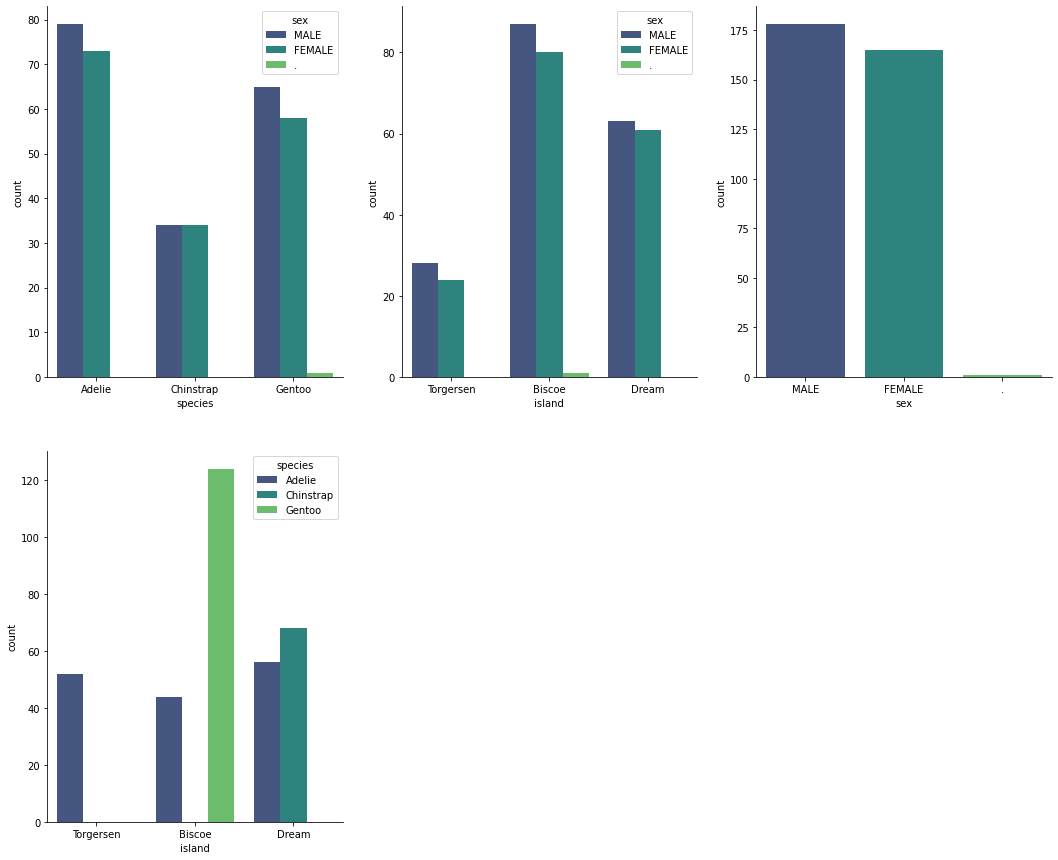

In [ ]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(2,3)
ax_species = fig.add_subplot(gs[0,0])
sns.countplot(x='species', hue='sex', data=penguin_data, ax=ax_species, palette='viridis')
sns.despine()
ax_island = fig.add_subplot(gs[0,1])
sns.countplot(x='island', hue='sex', data=penguin_data, ax=ax_island, palette='viridis')
sns.despine()
ax_sex = fig.add_subplot(gs[0,2])
sns.countplot(x='sex', data=penguin_data, ax=ax_sex, palette='viridis')
sns.despine()
ax_island2 = fig.add_subplot(gs[1,0])
sns.countplot(x='island', hue='species', data=penguin_data, ax=ax_island2, palette='viridis')
sns.despine()

Dari grafik dapat disimpulkan:
1. Spesies terbanyak adalah Penguin Adelie.
2. Pulau Biscoe ditempati dengan jumlah penguin terbanyak, disusul dengan Pulau Dream, lalu Pulau Torgersen.
3. Jumlah penguin terbanyak adalah yang berjenis kelamin jantan.
4. Penguin jenis Adelie tersebar di ketiga pulau. Penguin Chinstrap hanya ada di Pulau Dream. Penguin Gentoo hanya ada di Pulau Biscoe.

In [ ]:
# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
penguin_data.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


ANALISA NUMERIKAL

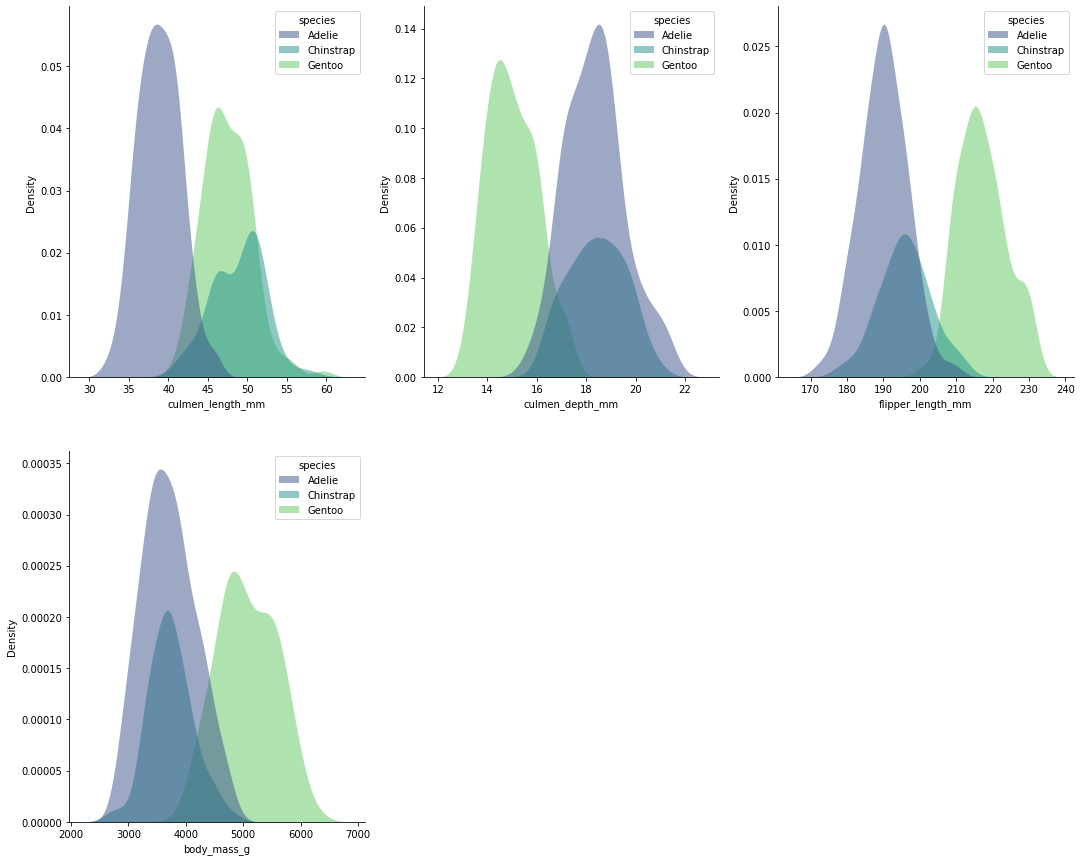

In [ ]:
fig = plt.figure(figsize=(18,15))
gs = fig.add_gridspec(2,3)
ax_c_lenght = fig.add_subplot(gs[0,0])
sns.kdeplot(x='culmen_length_mm', hue='species', data=penguin_data, fill=True, alpha=.5, linewidth=0, ax=ax_c_lenght, palette='viridis', shade=True)
sns.despine()
ax_c_depth = fig.add_subplot(gs[0,1])
sns.kdeplot(x='culmen_depth_mm', hue='species', data=penguin_data, fill=True, alpha=.5, linewidth=0, ax=ax_c_depth, palette='viridis', shade=True)
sns.despine()
ax_f_length = fig.add_subplot(gs[0,2])
sns.kdeplot(x='flipper_length_mm', hue='species', data=penguin_data, fill=True, alpha=.5, linewidth=0, ax=ax_f_length, palette='viridis', shade=True)
sns.despine()
ax_b_mass = fig.add_subplot(gs[1,0])
sns.kdeplot(x='body_mass_g', hue='species', data=penguin_data, fill=True, alpha=.5, linewidth=0, ax=ax_b_mass, palette='viridis', shade=True)
sns.despine()

<Figure size 1296x1080 with 0 Axes>

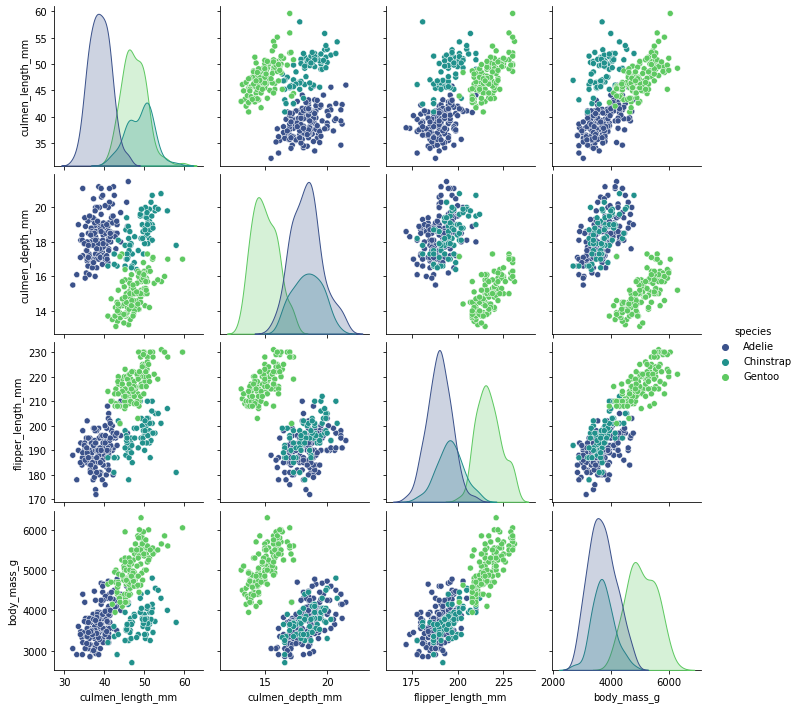

In [ ]:
plt.figure(figsize=(18,15))
sns.pairplot(data=penguin_data, hue='species', palette='viridis')
plt.show()

Dari grafik dapat disimpulkan:
1. Panjang sayap Penguin Chinstrap dan Penguin Adelie lebih pendek ketimbang Penguin Gentoo yaitu 175–215 mm, untuk Penguin Gentoo lebih panjang yaitu sekitar 200–235 mm.
2. berat Penguin Chinstrap dan Penguin Adelie lebih ringan yaitu kisaran 2500–5000 gram, dan Penguin Gentoo kisaran 3500–6500 gram yang artinya merupakan penguin terberat dibanding dua lainnya.
3. Panjang paruh Penguin Adelie lebih pendek diantara jenis penguin yang lain yaitu berkisar antara 30–45 mm, Penguin Gentoo dan Penguin Chinstrap memiliki panjang paruh yang hampir sama yaitu antara 40–55 mm.
4. Pada lebar paruh, Penguin Gentoo memiliki lebar paruh yang cenderung lebih pendek yaitu 12–18 mm, sedangkan lebar paruh Penguin Chinstrap dan Penguin Adelie hampir sama yaitu antara 15–21 mm.



**Pengaruh Jenis Kelamin dan Spesies Terhadap Data Numerikal**

<Figure size 576x432 with 0 Axes>

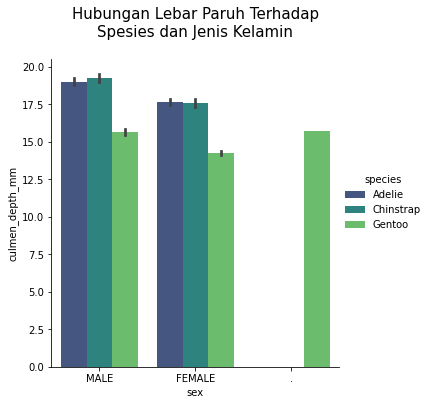

<Figure size 576x432 with 0 Axes>

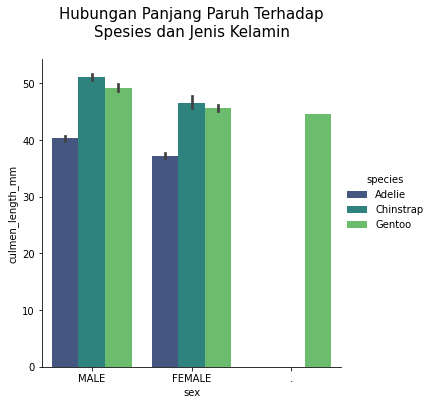

<Figure size 576x432 with 0 Axes>

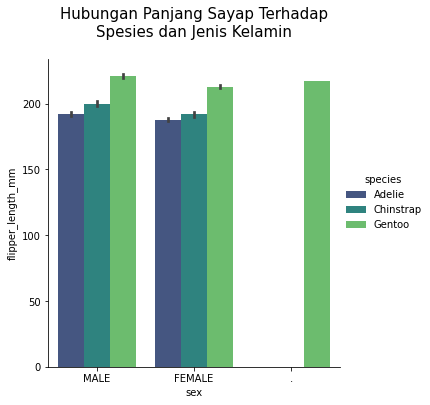

<Figure size 576x432 with 0 Axes>

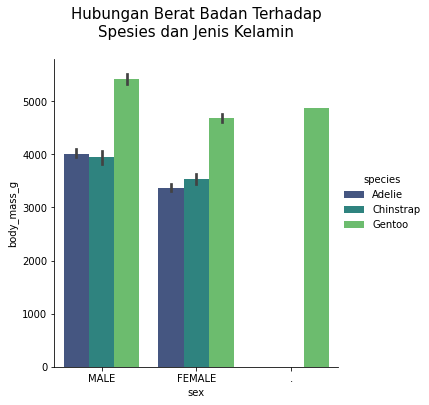

In [ ]:
plt.figure(figsize= (8,6))
sns.catplot(x='sex', y='culmen_depth_mm', hue='species', data=penguin_data, palette='viridis', kind='bar')
plt.title('Hubungan Lebar Paruh Terhadap\nSpesies dan Jenis Kelamin\n', fontsize=15)
sns.despine()
plt.figure(figsize= (8,6))
sns.catplot(x='sex', y='culmen_length_mm', hue='species', data=penguin_data, palette='viridis', kind='bar')
plt.title('Hubungan Panjang Paruh Terhadap\nSpesies dan Jenis Kelamin\n', fontsize=15)
sns.despine()
plt.figure(figsize= (8,6))
sns.catplot(x='sex', y='flipper_length_mm', hue='species', data=penguin_data, palette='viridis', kind='bar')
plt.title('Hubungan Panjang Sayap Terhadap\nSpesies dan Jenis Kelamin\n', fontsize=15)
sns.despine()
plt.figure(figsize= (8,6))
sns.catplot(x='sex', y='body_mass_g', hue='species', data=penguin_data, palette='viridis', kind='bar')
plt.title('Hubungan Berat Badan Terhadap\nSpesies dan Jenis Kelamin\n', fontsize=15)
sns.despine()

Dari grafik dapat disimpulkan bahwa:
1. Bentuk tubuh baik panjang dan lebar paruh, panjang sayap, dan berat dari penguin jantan lebih besar dibandingkan penguin betina.
2. Penguin Chinstrap jantan memiliki lebar paruh sedikit lebih lebar dari Penguin Adelie jantan, sedangkan untuk Penguin Chinstrap betina lebar paruh hampir sama dengan Penguin Adelie Betina.
3. Penguin Chinstrap jantan memiliki berat badan sedikit lebih ringan dibanding Penguin Adelie jantan, tetapi pada Penguin Chinstrap betina memiliki berat badan sedikit lebih berat dibanding Penguin Adelie betina.

**Hubungan antara Paruh dengan Spesies**

Text(0.5, 1.0, 'Sebaran Data Spesies Penguin\nBerdasarkan Panjang dan Lebar Paruh\n')

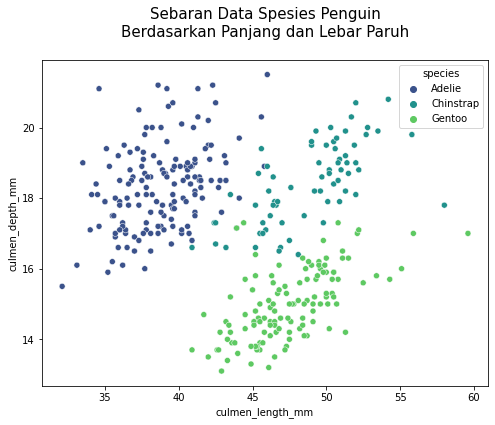

In [ ]:
plt.figure(figsize= (8,6))
sns.scatterplot(x=penguin_data.culmen_length_mm, y=penguin_data.culmen_depth_mm, hue=penguin_data.species, palette='viridis')
plt.title('Sebaran Data Spesies Penguin\nBerdasarkan Panjang dan Lebar Paruh\n', fontsize=15)

Dari data dapat dilihat bahwa masing-masing spesies memiliki panjang dan lebar paruh yang berbeda, sehingga muncul 3 tata letak pola scatter yang terkluster masing-masing.

1. ANALISIS BERDASAKAN SPESIES

Text(0.5, 1.0, 'Berat Penguin Berdasarkan Spesies\n')

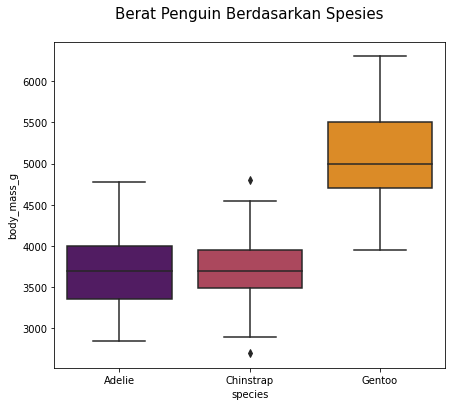

In [ ]:
# berat penguin berdasar spesies
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.species, y=penguin_data.body_mass_g, palette='inferno')
plt.title('Berat Penguin Berdasarkan Spesies\n', fontsize=15)

Text(0.5, 1.0, 'Panjang Paruh Penguin Berdasarkan Spesies\n')

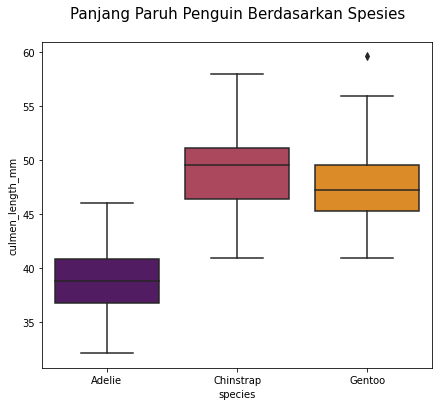

In [ ]:
# hubungan panjang paruh dengan spesies
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.species, y=penguin_data.culmen_length_mm, palette='inferno')
plt.title('Panjang Paruh Penguin Berdasarkan Spesies\n', fontsize=15)

Text(0.5, 1.0, 'Lebar Paruh Penguin Berdasarkan Spesies\n')

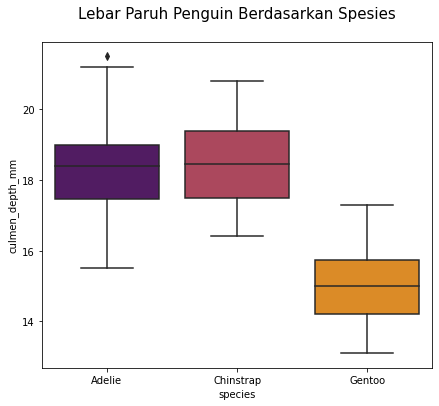

In [ ]:
# lebar paruh penguin berdasarkan spesies
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.species, y=penguin_data.culmen_depth_mm, palette='inferno')
plt.title('Lebar Paruh Penguin Berdasarkan Spesies\n', fontsize=15)

Text(0.5, 1.0, 'Panjang Sayap Penguin Berdasarkan Spesies\n')

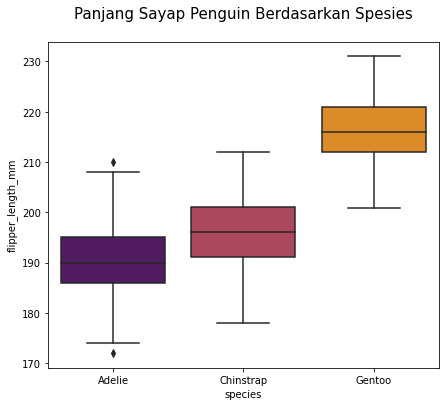

In [ ]:
# panjang sayap dengan spesies
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.species, y=penguin_data.flipper_length_mm, palette='inferno')
plt.title('Panjang Sayap Penguin Berdasarkan Spesies\n', fontsize=15)

2. ANALISIS BERDASARKAN JENIS KELAMIN


Text(0.5, 1.0, 'Berat Penguin Berdasarkan Jenis Kelamin\n')

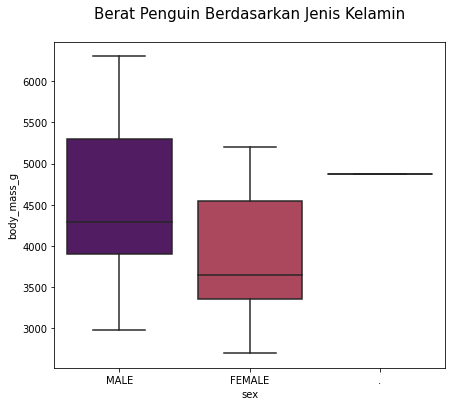

In [ ]:
# HUBUNGAN JENIS KELAMIN penguin DENGAN BERAT PENGUIN
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.sex, y=penguin_data.body_mass_g, palette='inferno')
plt.title('Berat Penguin Berdasarkan Jenis Kelamin\n', fontsize=15)

Text(0.5, 1.0, 'Panjang Paruh Penguin Berdasarkan Jenis Kelamin\n')

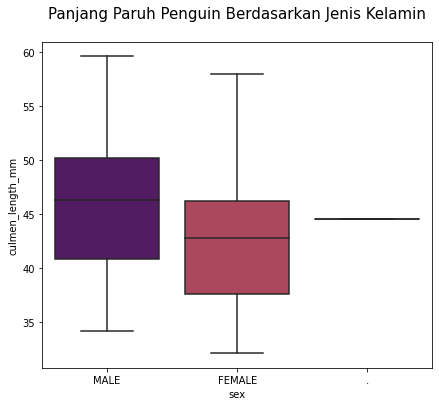

In [ ]:
# hubungan panjang paruh dengan jenis kelamin
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.sex, y=penguin_data.culmen_length_mm, palette='inferno')
plt.title('Panjang Paruh Penguin Berdasarkan Jenis Kelamin\n', fontsize=15)

Text(0.5, 1.0, 'Lebar Paruh Penguin Berdasarkan Jenis Kelamin\n')

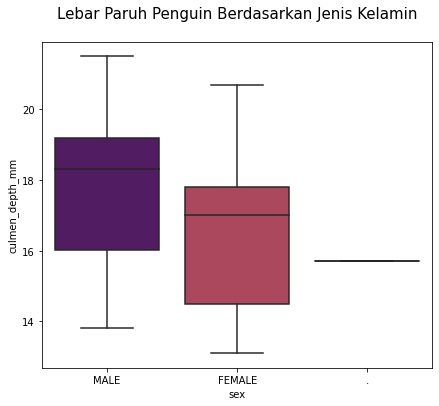

In [ ]:
# hubungan lebar paruh dengan jenis kelamin
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.sex, y=penguin_data.culmen_depth_mm, palette='inferno')
plt.title('Lebar Paruh Penguin Berdasarkan Jenis Kelamin\n', fontsize=15)

Text(0.5, 1.0, 'Panjang Sayap Penguin Berdasarkan Jenis Kelamin\n')

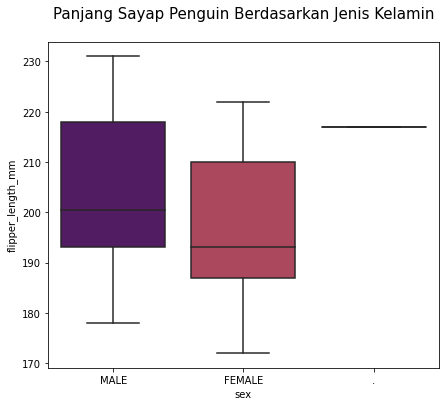

In [ ]:
# hubungan panjang sayap dengan jenis kelamin
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.sex, y=penguin_data.flipper_length_mm, palette='inferno')
plt.title('Panjang Sayap Penguin Berdasarkan Jenis Kelamin\n', fontsize=15)

3. ANALISIS BERDASARKAN PULAU


Text(0.5, 1.0, 'Berat Penguin Berdasarkan Tempat Hidup\n')

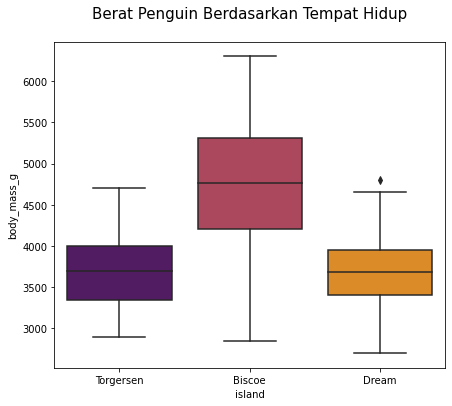

In [ ]:
# HUBUNGAN TEMPAT HIDUP penguin DENGAN BERAT PENGUIN
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.island, y=penguin_data.body_mass_g, palette='inferno')
plt.title('Berat Penguin Berdasarkan Tempat Hidup\n', fontsize=15)

Text(0.5, 1.0, 'Panjang Paruh Penguin Berdasarkan Temoat Hidup\n')

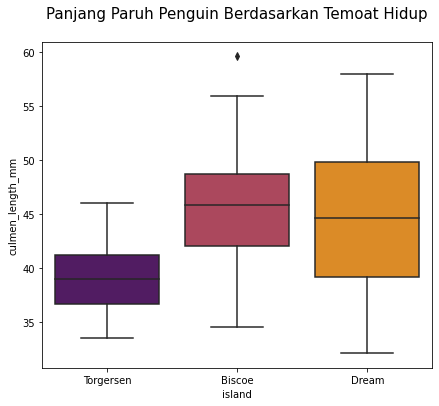

In [ ]:
# hubungan panjang paruh dengan tempat hidup
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.island, y=penguin_data.culmen_length_mm, palette='inferno')
plt.title('Panjang Paruh Penguin Berdasarkan Temoat Hidup\n', fontsize=15)

Text(0.5, 1.0, 'Lebar Paruh Penguin Berdasarkan Tempat Hidup\n')

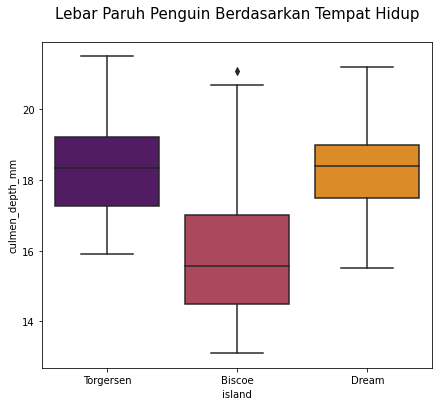

In [ ]:
# hubungan lebar paruh dengan tempat hidup
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.island, y=penguin_data.culmen_depth_mm, palette='inferno')
plt.title('Lebar Paruh Penguin Berdasarkan Tempat Hidup\n', fontsize=15)

Text(0.5, 1.0, 'Panjang Sayap Penguin Berdasarkan Tempat Hidup\n')

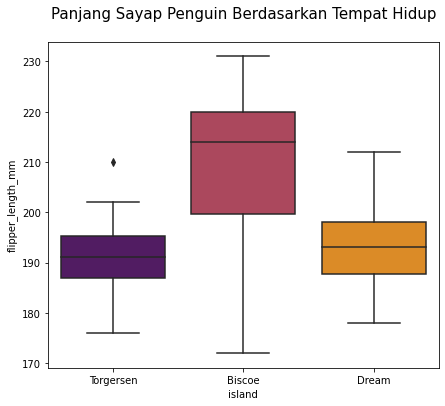

In [ ]:
# hubungan panjang sayap dengan tempat hidup
plt.figure(figsize= (7,6))
sns.boxplot(x=penguin_data.island, y=penguin_data.flipper_length_mm, palette='inferno')
plt.title('Panjang Sayap Penguin Berdasarkan Tempat Hidup\n', fontsize=15)

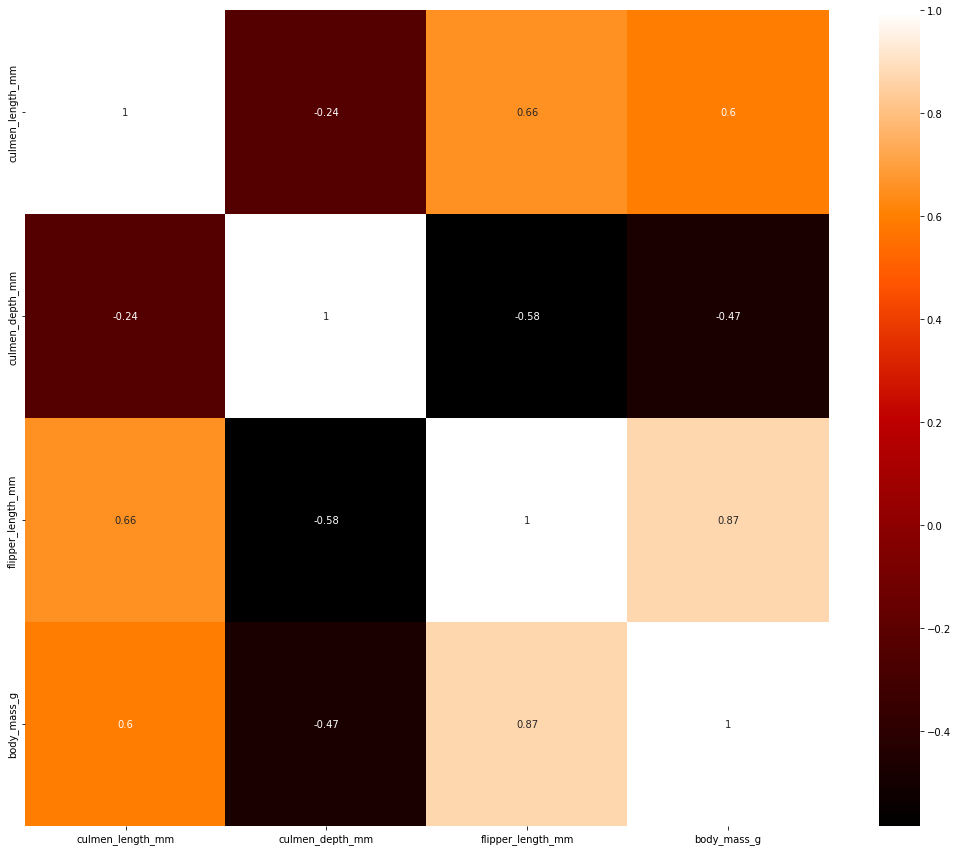

In [ ]:
plt.figure(figsize=(18,15))
sns.heatmap(penguin_data.corr(), cmap = 'gist_heat', annot = True)

Text(0.5, 1.0, 'Sebaran Data Spesies Penguin\nBerdasarkan Panjang dan Lebar Paruh\n')

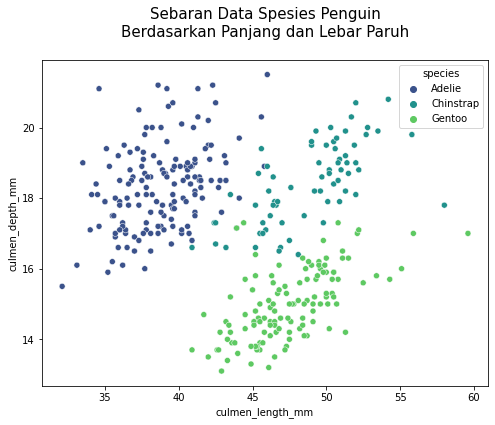

In [ ]:
plt.figure(figsize= (8,6))
sns.scatterplot(x=penguin_data.culmen_length_mm, y=penguin_data.culmen_depth_mm, hue=penguin_data.species, palette='viridis')
plt.title('Sebaran Data Spesies Penguin\nBerdasarkan Panjang dan Lebar Paruh\n', fontsize=15)

Dari tabel korelasi dapat disimpulkan bahwa panjang sayap pada penguin berkaitan erat dengan berat badan penguin. Semakin panjang sayap maka semakin berat penguin tersebut.


Dari hasil analisa data dapat disimpulkan:

1. Penguin Adelie menetap di ketiga pulau yang di Benua Antartika, dengan bentuk paruh lebih lebar dan pendek dibanding spesies lain, dan memiliki berat badan lebih ringan dari Penguin Gentoo, selain itu berat badan Penguin Adelie hampir sama dengan Penguin Chinstrap.
2. Penguin Chinstrap menetap di Pulau Dream , dengan bentuk paruh lebih panjang dan lebar dibanding spesies lain, dan memiliki berat badan lebih ringan dari Penguin Gentoo, selain itu berat badan Penguin Chinstrap hampir sama dengan Penguin Adelie.
3. Sedangkan Penguin Gentoo memiliki berat badan lebih berat dan berparuh lebih kecil dibanding kedua penguin lain, tetapi memiliki panjang paruh yang hampir sama dengan Penguin Chinstrap.
4. Semakin Panjang sayap penguin maka semakin berat tubuh penguin. Dengan Penguin Gentoo yang lebih berat dibanding penguin lain maka panjang sayap Penguin Gentoo lebih panjang dibanding penguin lain.
